Machine Learning

Common Functions

In [1]:
import numpy as np
import pandas as pd

def loadDataset(filename, deli):
    baseDeDados = pd.read_csv(filename, delimiter=deli)
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

def computeCategorization(X):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    #one hot encoding
    D = pd.get_dummies(X[:,0]).values
    
    X = X[:,1:]
    for ii in range(0, D.shape[1]):
        X = np.insert(X, X.shape[1], D[:,ii], axis=1)
    X = X[:,:X.shape[1] - 1]

    return X

def splitTrainTestSets(X, y, testSize):
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

def computeScaling(X):
    from sklearn.preprocessing import StandardScaler
    scaleobj = StandardScaler()
    X = scaleobj.fit_transform(X.astype(float))

    return X, scaleobj

Logistic Regression Classification

In [2]:
def computeLogisticRegressionModel(XTrain, yTrain, XTest):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(solver='lbfgs')
    classifier.fit(XTrain[0], yTrain)
    return classifier

def predictModel(classifier, XTest):
    return classifier.predict(XTest[0])

def evaluateModel(classifier, yPred, yTest):
    from sklearn.metrics import confusion_matrix
    confusionMatrix = confusion_matrix(yTest, yPred)
    return confusionMatrix
    
def computeLogisticRegressionExample(filename):
    X, y, csv = loadDataset(filename, ",")
    X = fillMissingData(X, 2, 3)

    #sex
    X = computeCategorization(X)
    #embark
    X = computeCategorization(X)

    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
    XTrain = computeScaling(XTrain)
    XTest = computeScaling(XTest)

    classifier = computeLogisticRegressionModel(XTrain, yTrain, XTest)
    yPred = predictModel(classifier, XTest)
    return evaluateModel(classifier, yPred, yTest)

In [3]:
def printAccuracy(confusionMatrix):
    accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / (confusionMatrix[0][0] + confusionMatrix[1][0] + confusionMatrix[0][1] + confusionMatrix[1][1])
    print(accuracy * 100)
confusionMatrix = computeLogisticRegressionExample("titanic.csv")
printAccuracy(confusionMatrix)

75.3731343283582


K-Nearest Neighbors

In [4]:
def computeKNNModel(XTrain, yTrain, XTest):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
    classifier.fit(XTrain[0], yTrain)
    return classifier

def predictModel(classifier, XTest):
    return classifier.predict(XTest[0])

def evaluateModel(classifier, yPred, yTest):
    from sklearn.metrics import confusion_matrix
    confusionMatrix = confusion_matrix(yTest, yPred)
    return confusionMatrix
    
def computeKNNExample(filename):
    X, y, csv = loadDataset(filename, ",")
    X = fillMissingData(X, 2, 3)
    #sex
    X = computeCategorization(X)
    #embark
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
    XTrain = computeScaling(XTrain)
    XTest = computeScaling(XTest)
    classifier = computeKNNModel(XTrain, yTrain, XTest)
    yPred = predictModel(classifier, XTest)
    return evaluateModel(classifier, yPred, yTest)

In [5]:
print(computeKNNExample("titanic.csv"))
print(computeKNNExample("pc.csv"))

[[79  7]
 [13 35]]
[[13  0]
 [ 2  0]]


In [6]:
def getAccuracy(confusionMatrix):
    accuracy = (confusionMatrix[0][0] + confusionMatrix[1][1]) / (confusionMatrix[0][0] + confusionMatrix[1][0] + confusionMatrix[0][1] + confusionMatrix[1][1])
    return accuracy * 100

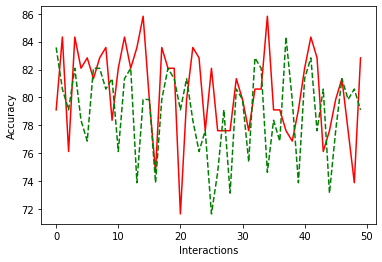

Mean and Standard deviation of Logistic Regression: 
80.43 3.13
Mean and Standard deviation of KNN: 
79.01 3.07


In [7]:
rlArray = []
for i in range(0, 50):
    confusionMatrixLR = computeLogisticRegressionExample("titanic.csv")
    rlArray.append(getAccuracy(confusionMatrixLR))
    
knnArray = []
for i in range(0, 50):
    confusionMatrixKNN = computeKNNExample("titanic.csv")
    knnArray.append(getAccuracy(confusionMatrixKNN))

import matplotlib.pyplot as plt
plt.plot(rlArray, 'r-', knnArray, 'g--')
plt.ylabel("Accuracy")
plt.xlabel("Interactions")
plt.show()

print("Mean and Standard deviation of Logistic Regression: ")
print("%.2f" % np.mean(rlArray), "%.2f" % np.std(rlArray))

print("Mean and Standard deviation of KNN: ")
print("%.2f" % np.mean(knnArray), "%.2f" % np.std(knnArray))

Classification Class

In [8]:
class ClassificationModel:
    def __init__(self):
        pass    

    def predictModel(classifier, X):
        return classifier.predict(X[0])

    def evaluateModel(yPred, yTest):
        from sklearn.metrics import confusion_matrix
        confusionMatrix = confusion_matrix(yTest, yPred)
        return confusionMatrix

    def preprocessData(filename):
        X, y, csv = loadDataset(filename, ",")
        X = fillMissingData(X, 2, 3)
        #sex
        X = computeCategorization(X)
        #embark
        X = computeCategorization(X)
        XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
        XTrain = computeScaling(XTrain)
        XTest = computeScaling(XTest)
        return XTrain, XTest, yTrain, yTest

Support Vector Machines

In [9]:
class LogisticRegression(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.linear_model import LogisticRegression

        classifier = LogisticRegression(solver='lbfgs')
        classifier.fit(XTrain[0], yTrain)

        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename)

        classifier = LogisticRegression.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [10]:
print(LogisticRegression.computeExample("titanic.csv"))

[[71 13]
 [15 35]]


In [11]:
class SVM(ClassificationModel):
    def computeModel(XTrain, yTrain, k):
        from sklearn.svm import SVC

        classifier = SVC(kernel=k)
        classifier.fit(XTrain[0], yTrain)

        return classifier

    def computeExample(filename, kernel):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename)

        classifier = SVM.computeModel(XTrain, yTrain, kernel)
        yPred = ClassificationModel.predictModel(classifier, XTest)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [12]:
SVM.computeExample("titanic.csv", "linear")

array([[63, 12],
       [19, 40]])

In [13]:
class KNN(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.neighbors import KNeighborsClassifier

        classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
        classifier.fit(XTrain[0], yTrain)

        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename)

        classifier = KNN.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [14]:
print(KNN.computeExample("titanic.csv"))

[[71 11]
 [17 35]]


In [15]:
rlArray = []
for i in range(0, 100):
    cmLR = LogisticRegression.computeExample("titanic.csv")
    rlArray.append(getAccuracy(cmLR))
print("Mean of Logistic Regression: %.2f" % np.mean(rlArray))
print("Standard Deviation of Logistic Regression: %.2f" % np.std(rlArray))

knnArray = []
for i in range(0, 100):
    cmKnn = KNN.computeExample("titanic.csv")
    knnArray.append(getAccuracy(cmKnn))
print("\nMean of KNN: %.2f" % np.mean(knnArray))
print("Standard Deviation of KNN: %.2f" % np.std(knnArray))

svmArray = []
for i in range(0, 100):
    cmSVM = SVM.computeExample("titanic.csv", "linear")
    svmArray.append(getAccuracy(cmSVM))
print("\nMean of SVM: %.2f" % np.mean(svmArray))
print("Standard Deviation of SVM: %.2f" % np.std(svmArray))

import matplotlib.pyplot as plt
plt.plot(rlArray, 'r-', knnArray, 'g--', svmArray, 'b^')
plt.ylabel("Accuracy")
plt.xlabel("Trials")
plt.show()

Mean of Logistic Regression: 79.80
Standard Deviation of Logistic Regression: 3.44

Mean of KNN: 79.22
Standard Deviation of KNN: 3.63


Kernel of Support Vector Machines

In [ ]:
class SVM(ClassificationModel):
    def computeModel(XTrain, yTrain, k, d):
        from sklearn.svm import SVC

        classifier = SVC(kernel=k, degree=d)
        classifier.fit(XTrain[0], yTrain)

        return classifier

    def computeExample(filename, kernel, degree):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename)

        classifier = SVM.computeModel(XTrain, yTrain, kernel, degree)
        yPred = ClassificationModel.predictModel(classifier, XTest)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [ ]:
from tqdm import tqdm
rlArray = []
for i in tqdm(range(0, 20)):
    cmLR = LogisticRegression.computeExample("titanic.csv")
    rlArray.append(getAccuracy(cmLR))
print("Mean of Logistic Regression: %.2f" % np.mean(rlArray))
print("Standard Deviation of Logistic Regression: %.2f" % np.std(rlArray))

knnArray = []
for i in tqdm(range(0, 20)):
    cmKnn = KNN.computeExample("titanic.csv")
    knnArray.append(getAccuracy(cmKnn))
print("\nMean of KNN: %.2f" % np.mean(knnArray))
print("Standard Deviation of KNN: %.2f" % np.std(knnArray))

svmLinearArray = []
for i in tqdm(range(0, 20)):
    cmSVML = SVM.computeExample("titanic.csv", "linear", 0)
    svmLinearArray.append(getAccuracy(cmSVML))
print("\nMean of SVM Linear: %.2f" % np.mean(svmLinearArray))
print("Standard Deviation of SVM Linear: %.2f" % np.std(svmLinearArray))

svmPoly3Array = []
for i in tqdm(range(0, 20)):
    cmSVMP3 = SVM.computeExample("titanic.csv", "poly", 3)
    svmPoly3Array.append(getAccuracy(cmSVMP3))
print("\nMean of SVM Poly 3: %.2f" % np.mean(svmPoly3Array))
print("Standard Deviation of SVM Poly 3: %.2f" % np.std(svmPoly3Array))

svmPoly4Array = []
for i in tqdm(range(0, 0)):
    cmSVMP4 = SVM.computeExample("titanic.csv", "poly", 4)
    svmPoly4Array.append(getAccuracy(cmSVMP4))
print("\nMean of SVM Poly 4: %.2f" % np.mean(svmPoly4Array))
print("Standard Deviation of SVM Poly 4: %.2f" % np.std(svmPoly4Array))

svmGaussArray = []
for i in tqdm(range(0, 20)):
    cmSVMG = SVM.computeExample("titanic.csv", "rbf", 0)
    svmGaussArray.append(getAccuracy(cmSVMG))
print("\nMean of SVM Gaussian: %.2f" % np.mean(svmGaussArray))
print("Standard Deviation of SVM Gaussian: %.2f" % np.std(svmGaussArray))

import matplotlib.pyplot as plt
plt.plot(rlArray, 'r-', knnArray, 'g--', svmGaussArray, 'b^')
plt.ylabel("Accuracy")
plt.xlabel("Trials")
plt.show()

100%|██████████| 20/20 [00:00<00:00, 32.46it/s]


Mean of Logistic Regression: 80.07
Standard Deviation of Logistic Regression: 2.97


100%|██████████| 20/20 [00:00<00:00, 35.82it/s]



Mean of KNN: 76.57
Standard Deviation of KNN: 3.00


100%|██████████| 20/20 [00:00<00:00, 29.26it/s]



Mean of SVM Linear: 78.17
Standard Deviation of SVM Linear: 3.22


100%|██████████| 20/20 [00:00<00:00, 22.53it/s]



Mean of SVM Poly 3: 80.93
Standard Deviation of SVM Poly 3: 3.48


  0%|          | 0/20 [00:00<?, ?it/s]

Naive Bayes

In [ ]:
class NaiveBayes(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.naive_bayes import GaussianNB

        classifier = GaussianNB()
        classifier.fit(XTrain[0], yTrain)

        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename, True)

        classifier = NaiveBayes.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest, False)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [ ]:
class ClassificationModel:
    def predictModel(classifier, X, isDecisionTree):
        if(isDecisionTree == False):
            X = X[0]
        return classifier.predict(X)

    def evaluateModel(yPred, yTest):
        from sklearn.metrics import confusion_matrix
        confusionMatrix = confusion_matrix(yTest, yPred)
        return confusionMatrix

    def preprocessData(filename, useFeatureScaling):
        X, y, csv = loadDataset(filename, ",")
        X = fillMissingData(X, 2, 3)
        #sex
        X = computeCategorization(X)
        #embark
        X = computeCategorization(X)
        XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
        if(useFeatureScaling == True):
            XTrain = computeScaling(XTrain)
            XTest = computeScaling(XTest)
        return XTrain, XTest, yTrain, yTest

In [ ]:
class DecisionTree(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy')
        classifier.fit(XTrain, yTrain)
        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename, False)

        classifier = DecisionTree.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest, True)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [ ]:
class KNN(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
        classifier.fit(XTrain[0], yTrain)
        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename, True)
        classifier = KNN.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest, False)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [ ]:
class LogisticRegression(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(solver='lbfgs')
        classifier.fit(XTrain[0], yTrain)
        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename, True)
        classifier = LogisticRegression.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest, False)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [ ]:
class SVM(ClassificationModel):
    def computeModel(XTrain, yTrain, k):
        from sklearn.svm import SVC
        classifier = SVC(kernel = k)
        classifier.fit(XTrain[0], yTrain)
        return classifier

    def computeExample(filename, kernel):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename, True)
        classifier = SVM.computeModel(XTrain, yTrain, kernel)
        yPred = ClassificationModel.predictModel(classifier, XTest, False)
        return ClassificationModel.evaluateModel(yPred, yTest)

Mean of Logistic Regression: 79.72
Standart Deviation of Logistic Regression: 2.80

Mean of o KNN: 79.16
Standart Deviation of KNN: 3.32

Mean of o SVM: 82.25
Standart Deviation of SVM: 2.89

Mean of o NB: 76.74
Standart Deviation of NB: 3.54

Mean of a DT: 77.85
Standart Deviation of DT: 3.59


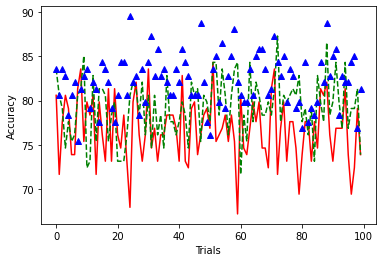

In [ ]:
rlArray = []
for i in range(0, 100):
    cmLR = LogisticRegression.computeExample("titanic.csv")
    rlArray.append(getAccuracy(cmLR))
print("Mean of Logistic Regression: %.2f" % np.mean(rlArray))
print("Standart Deviation of Logistic Regression: %.2f" % np.std(rlArray))

knnArray = []
for i in range(0, 100):
    cmKnn = KNN.computeExample("titanic.csv")
    knnArray.append(getAccuracy(cmKnn))
print("\nMean of o KNN: %.2f" % np.mean(knnArray))
print("Standart Deviation of KNN: %.2f" % np.std(knnArray))

svmArray = []
for i in range(0, 100):
    cmSVM = SVM.computeExample("titanic.csv", "rbf")
    svmArray.append(getAccuracy(cmSVM))
print("\nMean of o SVM: %.2f" % np.mean(svmArray))
print("Standart Deviation of SVM: %.2f" % np.std(svmArray))

NBArray = []
for i in range(0, 100):
    cmNB = NaiveBayes.computeExample("titanic.csv")
    NBArray.append(getAccuracy(cmNB))
print("\nMean of o NB: %.2f" % np.mean(NBArray))
print("Standart Deviation of NB: %.2f" % np.std(NBArray))

DTArray = []
for i in range(0, 100):
    cmDT = DecisionTree.computeExample("titanic.csv")
    DTArray.append(getAccuracy(cmDT))
print("\nMean of a DT: %.2f" % np.mean(DTArray))
print("Standart Deviation of DT: %.2f" % np.std(DTArray))

import matplotlib.pyplot as plt
plt.plot(NBArray, 'r-', knnArray, 'g--', svmArray, "b^")
plt.ylabel("Accuracy")
plt.xlabel("Trials")
plt.show()

Random Forest

In [ ]:
class RandomForest(ClassificationModel):
    def computeModel(XTrain, yTrain):
        from sklearn.ensemble import RandomForestClassifier

        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
        classifier.fit(XTrain, yTrain)

        return classifier

    def computeExample(filename):
        XTrain, XTest, yTrain, yTest = ClassificationModel.preprocessData(filename, False)

        classifier = RandomForest.computeModel(XTrain, yTrain)
        yPred = ClassificationModel.predictModel(classifier, XTest, True)
        return ClassificationModel.evaluateModel(yPred, yTest)

In [ ]:
rlArray = []
for i in range(0, 100):
    cmLR = LogisticRegression.computeExample("titanic.csv")
    rlArray.append(getAccuracy(cmLR))
print("Mean of Logistic Regression: %.2f" % np.mean(rlArray))
print("Standart Deviation of Logistic Regression: %.2f" % np.std(rlArray))

knnArray = []
for i in range(0, 100):
    cmKnn = KNN.computeExample("titanic.csv")
    knnArray.append(getAccuracy(cmKnn))
print("\nMean of o KNN: %.2f" % np.mean(knnArray))
print("Standart Deviation of KNN: %.2f" % np.std(knnArray))

svmArray = []
for i in range(0, 100):
    cmSVM = SVM.computeExample("titanic.csv", "rbf")
    svmArray.append(getAccuracy(cmSVM))
print("\nMean of o SVM: %.2f" % np.mean(svmArray))
print("Standart Deviation of SVM: %.2f" % np.std(svmArray))

NBArray = []
for i in range(0, 100):
    cmNB = NaiveBayes.computeExample("titanic.csv")
    NBArray.append(getAccuracy(cmNB))
print("\nMean of o NB: %.2f" % np.mean(NBArray))
print("Standart Deviation of NB: %.2f" % np.std(NBArray))

DTArray = []
for i in range(0, 100):
    cmDT = DecisionTree.computeExample("titanic.csv")
    DTArray.append(getAccuracy(cmDT))
print("\nMean of a DT: %.2f" % np.mean(DTArray))
print("Standart Deviation of DT: %.2f" % np.std(DTArray))

RFArray = []
for i in range(0, 100):
    cmRF = RandomForest.computeExample("titanic.csv")
    RFArray.append(getAccuracy(cmRF))
print("\nMean of RF: %.2f" % np.mean(RFArray))
print("Standart Deviation of RF: %.2f" % np.std(RFArray))

import matplotlib.pyplot as plt
plt.plot(knnArray, 'r-', RFArray, 'g--', svmArray, "b^")
plt.ylabel("Accuracy")
plt.xlabel("Trials")
plt.show()